#### credits: https://stackoverflow.com/a/59786233/10449294  #####

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from pydicom import dcmread
from pydicom.dataset import Dataset, FileDataset
from pydicom.uid import ExplicitVRLittleEndian
import pydicom._storage_sopclass_uids

#### read jpg/jpeg/png image as grayscale with int16 data type ####

(391, 436)


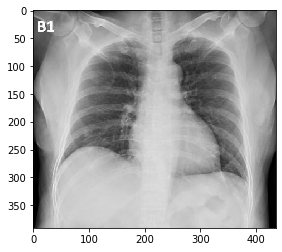

In [2]:
img=cv2.imread('temp.jpeg',0).astype(np.int16)
print(img.shape)
plt.imshow(img.astype(np.uint8),cmap='gray')

#### create meta data for dicom ####

In [3]:
meta = pydicom.Dataset()
meta.MediaStorageSOPClassUID = pydicom._storage_sopclass_uids.MRImageStorage
meta.MediaStorageSOPInstanceUID = pydicom.uid.generate_uid()
meta.TransferSyntaxUID = pydicom.uid.ExplicitVRLittleEndian  
ds = Dataset()
ds.file_meta = meta

ds.is_little_endian = True
ds.is_implicit_VR = False

ds.SOPClassUID = pydicom._storage_sopclass_uids.MRImageStorage
ds.PatientName = "Test^Firstname"
ds.PatientID = "123456"

ds.Modality = "MR"
ds.SeriesInstanceUID = pydicom.uid.generate_uid()
ds.StudyInstanceUID = pydicom.uid.generate_uid()
ds.FrameOfReferenceUID = pydicom.uid.generate_uid()

ds.BitsStored = 16
ds.BitsAllocated = 16
ds.SamplesPerPixel = 1
ds.HighBit = 15

ds.ImagesInAcquisition = "1"
ds.ImagePositionPatient = r"0\0\1"
ds.ImageOrientationPatient = r"1\0\0\0\-1\0"
ds.ImageType = r"ORIGINAL\PRIMARY\AXIAL"
ds.RescaleIntercept = "0"
ds.RescaleSlope = "1"
ds.PixelSpacing = r"1\1"
ds.PhotometricInterpretation = "MONOCHROME2"
ds.PixelRepresentation = 1

#### The pydicom dataset has attributes of Rows,Columns,PixelData which should be filled by attributes of target image array ####

In [4]:
ds.Rows = img.shape[0]
ds.Columns = img.shape[1]
ds.InstanceNumber = 1
pydicom.dataset.validate_file_meta(ds.file_meta, enforce_standard=True)
ds.PixelData = img.tobytes()

#### Saving image array as dicom 
ds.save_as("out.dcm")

#### lets check whether we can affirmatively read the saved dicom ####

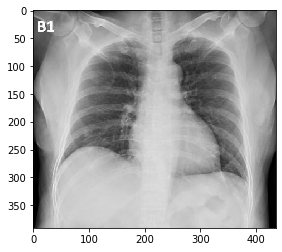

In [5]:
out=dcmread('out.dcm',force=True)
plt.imshow(out.pixel_array,cmap='gray')

In [6]:
out.pixel_array.shape==img.shape

True